In [66]:
# Box C at high frequencies
# Resistance at 0 frequency (R_initial) measured to be 114 Ohms
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit as cvf

In [88]:
f = np.array([10.11,298,399,500,611,704,806,911,1023,1907,3006,3990,4522,5020,5993,6578,7060,8003,9012,10006,20000,30000,40000,50000,60000,70000,80000,90000,100000])
r = np.array([70,100,115,120,120,130,130,120,140,170,250,300,350,390,460,510,550,640,770,870,12000,1412,700,500,400,340,300,260,230])
v1 = np.array([0.288,0.32,0.304,0.304,0.304,0.296,0.304,0.336,0.32,0.36,0.368,0.4,0.392,0.4,0.416,0.408,0.416,0.416,0.416,0.424104,80,100,100,100,92,92,284,292])
v2 = np.array([0.228,0.28,0.32,0.304,0.304,0.312,0.312,0.312,0.336,0.344,0.376,0.376,0.392,0.392,0.4,0.4,0.4,0.408,0.416,0.416104,68,96,96,96,90,94,284,292])
ph = np.array([0,15.0192,8.6184,14.4,24.1956,25.344,29.016,36.0756,36.828,60.41376,69.25824,74.6928,74.88432,77.7096,77.66928,78.14664,76.248,74.90808,77.86368,77.8066560,0,87,95,95.4,87.5,93.2,95,94,94])
z = np.array([70,114,152,120,120,123,127,129,133,178,245,319,350,398,478.4,520,572,653,770,887,12000,1200,729,521,417,348,294,260,230])

f_new = np.linspace(f[0],f[-1],num=len(f)*1000)
sigma_f = np.std(f)
sigma_z = np.std(z)
sigma_z

2138.2900506344067

In [102]:
# 1/(L*C) = (2pi*fmax)**2

def circuit(f,r,l,c):
    w = 2*np.pi*f #angular frequency
    return (r*w*c)/np.sqrt((1-l*c*w**2)**2 + (c*w*r)**2)

guessR = max(f[::])
guessC = 1/(2*np.pi)* ( f/guessR)
guessL = 1/(2*np.pi)* ( f/guessC)
guessing = [guessR,guessC,guessL]

psol, pcov = cvf(circuit,f,z,p0=guessing,absolute_sigma=1)
psol

popt, pcov = opt.curve_fit(fitfunction, x, y, sigma=dy, p0=guessparams,absolute_sigma=1)

flist = np.linspace(0,100000,1000)
guestlist = np.fromiter( (circuit(x,*guessing)for x in flist),np.float)
flisting = np.fromiter( (circuit(x,*sol)for x in flist),np.float)
ulist = np.fromiter( (circuit(x, sol[0],sol[1]*1000,sol[2]/1000,R=1000)for x in flist),np.float)

ValueError: setting an array element with a sequence.

<function matplotlib.pyplot.show>

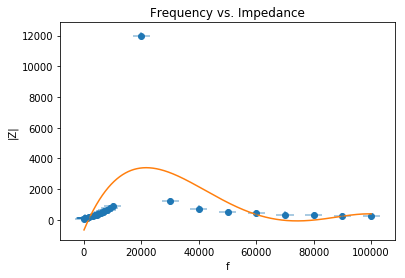

In [100]:
plt.scatter(f,z)
plt.title('Frequency vs. Impedance')
plt.xlabel('f')
plt.ylabel('|Z|')
plt.errorbar(f,z,xerr=sigma_f*.1,yerr=(sigma_z)*.1,marker='.',linestyle='None',alpha=0.5)
fc = poly.polyfit(f,z,4)
ffit = poly.polyval(f_new,fc)
plt.plot(f_new,ffit)
plt.show

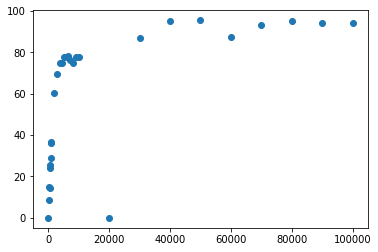

In [19]:
plt.scatter(f,ph)

In [ ]:
# smoothie lines

